<a href="https://colab.research.google.com/github/TheRedTreant/Math-152/blob/main/Exploration_1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration 1
# Group: Nice Eggs
# Members: Oleg Trifonov, Jenna Borzellino, Samantha Taylor, Kaden Wallace, Yingjie Liu 
# Topic 1: Gauss's Circle Conjecture


First we found an equation for L(R), an equation that computes the sum of all latice points in a circle. Our first attempt at this equation was unable to compute larger numbers. To make the function run more quickly, we changed the range of the function so that it would compute less overall, and thus speeding up the program (all four attempts are shown below). Our fastest attempt can  run up to 10,000.

Next, we made an error function, that computed the absolute value of the difference between the area of a circle of radius R and the sum of the lattice points of a circle of radius R. Next, we were interested to see what the errror percentage was for different circles so we created a function that could calculate that for circles of radius R. 

After that, we made a graph in order to compare the groth of the error in comparison to different powers of R. We noticed for powers of R greater than oe equal to 1, the error percentage grows smaller and smaller as R increases. 

Finally, we found the L(R) and error equations for the three dimensional plane.

First let us import some useful functions that will help us later on.

In [ ]:
from matplotlib import pyplot as plt
from mpmath import *
import math

Now to start off we need to compute L(R). We know we have an input of R, two varying integers, and a counter to see how many times our loop is satisfied. So, these must all be present in our code.

In [ ]:
def latcount(R): #defined function
  count=0 #started count at 0
  for n in range(-R,R+1): #we know our range is -R to R+1 as this allows us to get a range from our input 
    for m in range(-R,R+1):#and we want to include all the negative inputs as well as R
      if (n**2+m**2)>R**2:#we only want the values less than or equal to R squared,
        count=count#so we leave the counter the same 
      else:#This will only be satisfied if the values are less than or equal to R squared
        count=count+1#and when satisfied we raise our count by 1
  print(count)#then print the final count



In [ ]:
latcount(100)

31417


In [ ]:
latcount(1000)

3141549


In [ ]:
#we see that at 10000 it starts to take a lot more time
#this could be caused by the size of our range of numbers, taking in -R to R+1
#makes sure we have all lattice in all 4 quadrants. But if we were just to find the number of lattice points in a single quadrant and multiply it by 4
#I think it should give us the same result while taking less time
def latcount_2(R):
  count=0
  for n in range(0,R+1):
    for m in range(0,R+1):
      if (n**2+m**2)>R**2:
        count=count
      else:
        count=count+1
  print(count*4)

#we see that this code runs faster however its not yeilding the same result from before. This number is greater and is probably due to recounting lattice points.
#since this attempt didnt work, ill try something different
def latcount_3(R):
  count=0
  for n in range(-R,R+1):
    for m in range(0,R+1):
      if (n**2+m**2)<=R**2:
        count=count+1
  print(count*2-2*R-1)

#this works because im accounting for the numbers im counting more than once by subtracting them at the end.
#now that I know this i think i can make the first code I wrote faster and still work
def latcount_4(R):
  count=0
  square=R*R
  for n in range(0,R+1):
    for m in range(0,R+1):
      if (n**2+m**2)<=square:
        count=count+1
  print(count*4-4*R-3)
latcount_4(10000)
#it works and is seemingly faster however for a number like 10000 it just takes too long.



314159053


Compute E(R)=A(R)-L(R)

In [ ]:
def error(R):
  area=3.141592653589793*R**2
  count=0
  for n in range(-R,R+1):
    for m in range(-R,R+1):
      if (n**2+m**2)>R**2:
        if(m>0):   # here make an early break to reduce redundant calculations
          break
      else:
        count=count+1
  #print(area-count)
  return abs((area-count))

In [ ]:
error(5)

2.4601836602551685

In [ ]:
error(10)

2.840734641020674

In [ ]:
def error_percent(R):
  area=3.141592653589793*R**2
  count=0
  for n in range(-R,R+1):
    for m in range(-R,R+1):
      if (n**2+m**2)>R**2:
        if(m>0):
          break
      else:
        count=count+1
  return (100*(count-area)/area)

In [ ]:
error_percent(5)

3.132403123548177

Analyze the growing speed of E(R) in comparison to $R$,$R^2$,$\sqrt{R}$,$R^{3/2}$, then visualizing using matplotlib

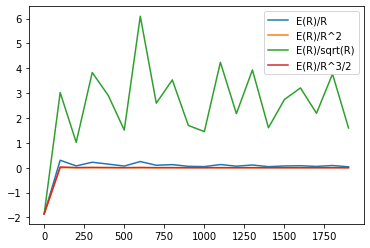

In [ ]:
##  here the lists store the ratio of error(R) respectively to R,R**2,sqrt(R),R**(1.5)
##  in order to discover the growing speed of E(R) in comparison to R,R**2,sqrt(R) and R**(1.5)
x=[]
y1=[]
y2=[]
y3=[]
y4=[]
for R in range(1,2000,100): # go from 1 to 2000 with step 100
  x.append(R)
  err=error(R)  #calculate error(R)
  #calculate different ratio
  y1.append(err/R)
  y2.append(err/(R**2))
  y3.append(err/math.sqrt(R))
  y4.append(err/R**(1.5))
# ploting
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.legend(['E(R)/R','E(R)/R^2','E(R)/sqrt(R)','E(R)/R^3/2'])
plt.show()
# we use matploblib to print the trend of the ratios as R grows, 
# we know that if E(R) grows as fast as f(R), then E(R)/f(R) should stay within certain limits when R is large
# from the figure we can see that E(R) grows nearly as fast as sqrt(R), as the value of green line stay in a certain range
# whlie other ratios approach to zero when R is large, which indicates that E(R) grows slower than R,R**2,etc.

From the plot above we can see that E(R) grows slower than $R$, $R^{3/2}$ and $R^2$ as the ratio approximates to zero when R is big. The ratio of $E(R)/\sqrt{R}$ maintains in a certain range. Therefore $E(R)\approx$ $O(\sqrt{R})$

compute L(R) in 3d-sphere

In [ ]:
def space_count(R):
  count=0
  for x in range(-R,R+1):
    for y in range(-R,R+1):
      for z in range(-R,R+1):
        if (x**2+y**2+z**2)>R**2:
          count=count
        else:
          count=count+1
  print(count)

In [ ]:
space_count(3)

123


Compute E(R) in 3d-sphere

In [ ]:
def space_error(R):
  area=(4/3)*3.14159*R**3
  count=0
  for x in range(-R,R+1):
    for y in range(-R,R+1):
      for z in range(-R,R+1):
        if (x**2+y**2+z**2)>R**2:
          count=count
        else:
          count=count+1
  print(area-count)

In [ ]:
space_error(3)

-9.902760000000015


In conclusion, we found and programmed functions for the sum of the lattice points, area, and error between the two of radius R, and discovered what happens to the area as R grows and shrinks, and even what happens when used in the third dimension.